# Tutorial - Logistic Regression

### Classification techniques are more essential in machine learning and data mining applications. Approximately 70% of problems in data science are classification problems.

## Applications of Logistic Regression

Logistic Regression can be used for various classification problems such as spam detection. Diabetes prediction, if a given customer will purchase a particular product or will they churn another competitor, whether the user will click on a given advertisement link or not, and many more examples are in the bucket.

# Logistic Regression

Logistic Regression is a statistical method of predicting binary classes. The outcome of target variable is dichotomous(divided in two parts) in nature. It computes probability of an event occurrence.

It is a special case of linear regression where the target class is categorical in nature. It uses a log of 'odds'(Odds are not probability it is the calculation of {p[event occurs]/p[event not occurs]}) as a dependent variable.

Logistic Regression predicts the probability of occurrences of a binary event (either 0's = 'No' or 1's = 'yes') utilizing a logit function (It will calculate Log).

### Linear Regression Equation:

                y = b0 + b1X1 + b2X2 + .... + bnXn
                
                where, 
                b = beta,
                y = dependent variable,
                X1, X2.. and Xn = explanatory variables (independent variable)

### Sigmoid Function:

                             -y
                p = 1 / 1 + e
                
                
                
Sigmoid function also called as Logistic function gives as 'S' shape curve that can take any valued number and map it into 0 and 1. If Curve goes positive infinity , y predicted will become 1, and if negative infinity y predicted will become 0. 

If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. The outputcannotFor example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.

                      1
            f(x) = -------
                         -(x)
                    1 + e

### Apply sigmoid function on Linear Regression:

                            -(b0 + b1X1 + b2X2 + .... + bnXn)
               p = 1 / 1 + e

## Types of Logistic Regression:
 1.    Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
    
 2.   Multinomial Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.
    
 3.   Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

In [40]:
#import required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading CSV File

In [41]:
data = pd.read_csv("C:/Users/nilesh.s.mandge/Documents/Data Science/the-ultimate-halloween-candy-power-ranking/candy-data.csv")

In [42]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


#### Checking is there any null value is present in dataset or not

In [44]:
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

## Model building in scikit-learn

### Selecting Feature:

Here, we need to divide the given columns into two types of variables dependent(or target variable) and independent variable (or feature variable).

In this case we will try to predict if a candy is chocolate based or not, based on other features if its chocolate based, result will be 1 else it will be 0.

In [45]:
y = data.chocolate.values
y

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [54]:
x_data = data.drop(['chocolate'], axis=1)
x_data.head()

,competitorname,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [55]:
feature_cols = ['fruity', 'caramel', 'peanutyalmondy', 'nougat','crispedricewafer','hard','bar']

x = data[feature_cols]

### Splitting Data:

To understand the model performance, dividing the dataset into a training set, and test set is a good strategy.

Let's split dataset by function train_test_split(). We need to pass 3 parameters features, target, and test_set size. Additionally, we can use random_state to select records randomly.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [61]:
X_train.count()

fruity              63
caramel             63
peanutyalmondy      63
nougat              63
crispedricewafer    63
hard                63
bar                 63
dtype: int64

## Model Development and Prediction:

First Import LogisticRegression module and createa Logistic Regression classifier object using LogisticRegression() function.

Then fit your model on the train set using fit() and perform prediction on the test set using predict()

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\nilesh.s.mandge\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Model Evaluation using confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [32]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9, 4],
       [1, 8]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 9 and 8 are actual predictions, and 4 and 1 are incorrect predictions.

## Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

In [33]:
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

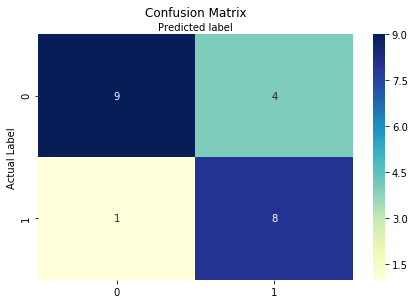

In [34]:
class_names = [0,1] # name of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics

Lets evaluate the model using model evaluation metrics such as accuracy, precision, and recall

In [35]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))

Accuracy:  0.7727272727272727
Precision:  0.6666666666666666
Recall:  0.8888888888888888


Well, you got a classification rate of 77%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted candy is chocolate based or not, that candies have 66% of the time.

Recall: If there are candies who is chocolate based in the test set and your Logistic Regression model can identify it 88% of the time.

## ROC Curve:

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

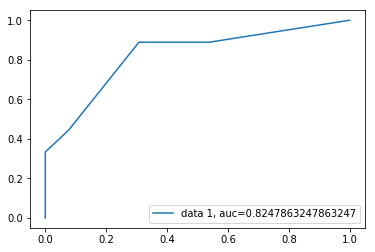

In [36]:
y_pred_prob = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.82. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.